> ## Python Exercise : Decision Tree Clasiifier

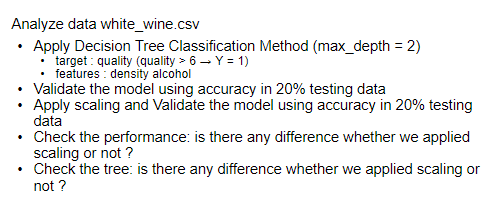

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
#1. Load dataset

wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
#2.Feature engineering

wine['label'] = np.where(wine['quality'] > 6, 1, 0) #membuat kolom label
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True) #mengisi data kosong di kolom alkohol

In [4]:
#3. Menentukan variabel dependent dan independen

X = wine[['density', 'alcohol']]
y = wine['label']

In [5]:
#4. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [6]:
#5. Membuat model DT

tree = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
#Melihat parameter yg ada di model yg kita buat diatas

tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [8]:
#6. Melihat feature importance = untuk melihat feature yg penting bagi DT

tree.feature_importances_

#jadi lebih penting: density (sesuai format saat nentuin variabel)

array([0.63988816, 0.36011184])

In [9]:
#7. Melakukan prediksi

y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [10]:
#8. Model performance: accuracy test

accuracy_score(y_test, y_pred)

0.9326923076923077

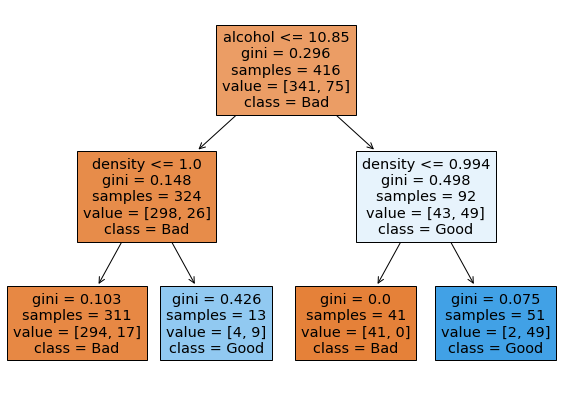

In [11]:
#9. Membuat plot tree

from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))                                     #0      #1
plot_tree(tree, feature_names = list(X.columns), class_names=['Bad', 'Good'], filled=True)
plt.show()

In [22]:
#Untuk mengecek keseluruhan sesuai data ke-

i = 4


print('Value test', X_test.iloc[i])
print('Probablity predict', tree.predict_proba([X_test.iloc[i]])) #nilai probability kelas bad, kelas good
print('Predict Class', y_test.iloc[i]) #hasil predict class (kelas 1 = good)

Value test density     0.9962
alcohol    12.4000
Name: 13, dtype: float64
Probablity predict [[0.03921569 0.96078431]]
Predict Class 1
